# Modelos de pronóstico en el sector inmobiliario de Bogotá
**John González**

![](https://d31dn7nfpuwjnm.cloudfront.net/images/valoraciones/0034/8136/casa-hipotecada-se-puede-vender.png?1565825047)

A partir de la información disponible en la página [metrocuadrado](https://www.metrocuadrado.com/) en esta actividad se pretende realizar los siguientes modelos de pronóstico de la vivienda en Bogotá:

1. Precio.
2. Tipo de inmueble.
3. Zona de ubicación.


## Configuración
Para este problema se importarán los paquetes:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Descargando y limpiando datos
Los datos de metrocuadrado se obtuvieron a partir de técnicas de webscraping, se seleccionaron las columnas más relevantes para esta actividad y se almacenaron en un archivo csv.

In [4]:
datos = pd.read_csv('https://drive.google.com/uc?id=1jwQo5QLpdgfjqi17NV3t_nt6t8uuERgJ')

Una vez los datos se han cargado, se ajusta cada variable para que su tipo corresponda con los valores.

In [12]:
# Las siguientes variables contienen valores 5+ indicando que hay mas de 5.
# En tal caso se pasan a 6 y se convierte a tipo float
datos['mnrocuartos'] = datos.mnrocuartos.apply(lambda x: 6 if x=='5+' else x).astype(float)
datos['mnrobanos'] = datos.mnrobanos.apply(lambda x: 6 if x=='5+' else x).astype(float)

# Las siguientes variables se pasan a tipo categórico
datos['mzona'] = datos.mzona.astype('category')
datos['mbarrio']= datos.mbarrio.astype('category')
datos['mnombrecomunbarrio'] = datos.mnombrecomunbarrio.astype('category')
datos['mtipoinmueble'] = datos.mtipoinmueble.astype('category')

# Se muestra la información de las variables
datos.info()

# Se eliminan los registros que tengan al menos un valor nulo y la primer columna Unnamed: 0
datos.dropna(inplace = True)
datos.drop(columns = 'Unnamed: 0', inplace = True)

# Y se presentan los datos
datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          10000 non-null  int64   
 1   mtipoinmueble       10000 non-null  category
 2   mvalorventa         10000 non-null  int64   
 3   marea               10000 non-null  float64 
 4   mnrocuartos         9993 non-null   float64 
 5   mnrobanos           10000 non-null  float64 
 6   mnrogarajes         9945 non-null   float64 
 7   mzona               9812 non-null   category
 8   mbarrio             9945 non-null   category
 9   mnombrecomunbarrio  9866 non-null   category
dtypes: category(4), float64(4), int64(2)
memory usage: 577.3 KB


,mtipoinmueble,mvalorventa,marea,mnrocuartos,mnrobanos,mnrogarajes,mzona,mbarrio,mnombrecomunbarrio
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza
4,Apartamento,1850000000,190.0,3.0,4.0,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES
5,Apartamento,210000000,52.0,3.0,1.0,1.0,Noroccidente,GILMAR,COLINA GILMAR
...,...,...,...,...,...,...,...,...,...
9995,Apartamento,580000000,0.0,2.0,3.0,2.0,Norte,SANTA BARBARA OCCIDENTAL,Santa Barbara Occidental-Usaquén
9996,Casa,330000000,72.0,3.0,2.0,1.0,Norte,LA LIBERIA,LAS MARGARITAS
9997,Casa,1200000000,400.0,3.0,4.0,3.0,Norte,EL CONTADOR,El Contador
9998,Casa,642000000,191.0,4.0,4.0,2.0,Noroccidente,CIUDAD JARDIN NORTE,Gratamira


### Para contabilizar los valores obtenidos con Unique
En la primera opción se obtiene los valores en dos arreglos arreglo, la segunda ya te lo retorna completo. 

In [14]:
np.unique(datos['mnrocuartos'], return_counts=True) # Retorna dos arreglos

(array([1., 2., 3., 4., 5., 6.]),
 array([ 798, 1889, 4862, 1491,  570,    6], dtype=int64))

In [15]:
datos['mnrocuartos'].value_counts()

3.0    4862
2.0    1889
4.0    1491
1.0     798
5.0     570
6.0       6
Name: mnrocuartos, dtype: int64

En seguida se muestran los gráfico univariados de algunas variables de la tabla de datos

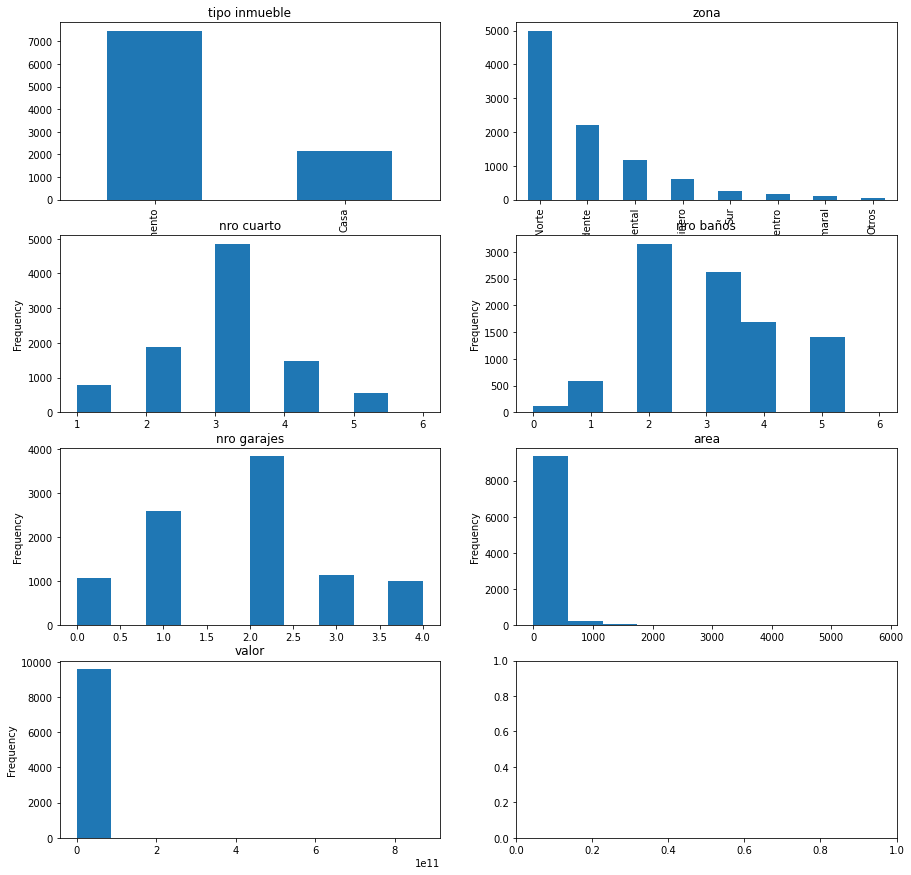

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(15,15))
datos.mtipoinmueble.value_counts().plot.bar(ax = axs[0,0], title = 'tipo inmueble')
datos.mzona.value_counts().plot.bar(ax = axs[0,1], title = 'zona')
datos.mnrocuartos.plot.hist(ax = axs[1,0], title = 'nro cuarto')
datos.mnrobanos.plot.hist(ax = axs[1,1], title = 'nro baños')
datos.mnrogarajes.plot.hist(ax = axs[2,0], title = 'nro garajes')
datos.marea.plot.hist(ax = axs[2,1], title = 'area')
datos.mvalorventa.plot.hist(ax = axs[3,0], title = 'valor')
plt.show()

## Actividad 1: Pronóstico del precio

Se intuye que el precio se asocia al área. Por tal motivo se iniciará con un modelo de regresión lineal con el área como variable dependiente. La gráfica que representa estas dos variables es la siguiente.

Text(0.5, 0, 'Area ($m^2$)')

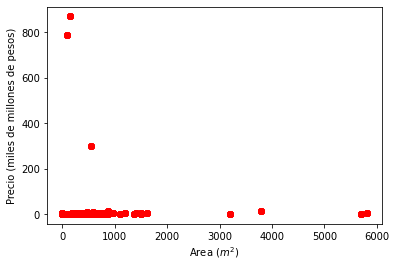

In [ ]:
plt.plot(datos['marea'], datos['mvalorventa']/1e9, 'ro')
plt.ylabel('Precio (miles de millones de pesos)')
plt.xlabel('Area ($m^2$)')

Como se puede observar existen viviendas cuyo precio y área es muy alta en comparación con las demás y parece que no son representativas. Por tal motivo se filtran los datos para que no contengan estos registros.

In [ ]:
# Se crea el filtro
filtro = (datos.mvalorventa < 1e10) & (datos.marea < 1750) & (datos.marea != 0 )

# Se filtran los datos
datos_filtro = datos[filtro]
print('cantidad de registros en datos filtrados', len(datos_filtro))

cantidad de registros en datos filtrados 8622


En seguida se presenta una gráfica de dispersión con los datos filtrados

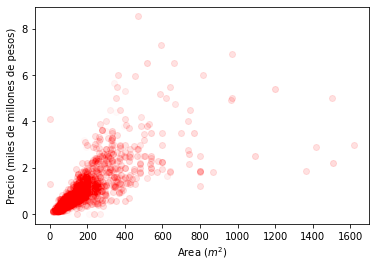

In [ ]:
plt.plot(datos_filtro['marea'], datos_filtro['mvalorventa']/1e9, 'ro', alpha = 0.02)
plt.ylabel('Precio (miles de millones de pesos)')
plt.xlabel('Area ($m^2$)')
plt.show()

Ahora, podemos proponer un primer modelo lineal entre el precio y el área para este conjunto de datos. Se realizará de dos maneras diferentes. El método analítico usando la ecuación normal y el método aproximado usando el gradiente descendente.

### **Ejercicio 1a**: Método analítico

Realice un modelo de regresión lineal utilizando los siguientes métodos:

1. Ecuación normal.
2. Ecuación normal mediante el paquete `sklearn`.

Reporte los parámetros $\theta_0$ y $\theta_1$ y explique su significado. Además realice algunas validaciones de pronóstico.

In [ ]:
########################
# Inserte su código aquí
########################

### **Ejercicio 1b**: Método por aproximación

Ahora utilice la aproximación a la solución de la ecuación normal mediante el método Gradiente descendente. Aplique las siguientes técnicas:

3. Batch Gradient Descendent.
4. Stochastic Gradient Descendent.
5. Mini-batch Gradient Descendent.

Reporte $\theta_0$ y $\theta_1$, sus resultados deberían ser muy próximos a los reportados en el ejercicio 1a. Explique las diferencias entre estos métodos apoyándose en gráficas descriptivas.

* **Nota 1**: Debe convertit la variable `y` (serie) a un arreglo `numpy`. Para hacerlo puede utilizar `y_ = y.to_numpy().reshape(-1,1)`
* **Nota 2**: Debe ser cuidadoso con la selección del parámetro $\alpha$.

In [ ]:
########################
# Inserte su código aquí
########################

Aunque es un poco atrevido suponer que los datos tienen comportamiento polinómico, como ejercicio se desea realizar este modelo.

### **Ejercicio 2**: Regresión polinómica

Construya varios modelos polinómicos, eligiendo algunos grados desde 1 hasta 300. ¿Cuál modelo considera que representa mejor la información suministrada y por qué?

In [ ]:
########################
# Inserte su código aquí
########################

#### Mejorando el modelo agregando más variables

Ahora se incorporan más variables al modelo de regresión lineal simple seleccionando de manera adecuada la matriz de entrada $X$ y se evalúa su desempeño mediante el error cuadrático medio.



In [ ]:
# Esta función permite concatenar en una sola tabla las 
# variables numéricas y categóricas seleccionadas

def tabla_con_variables_seleccionadas(num_columnas, cat_columnas):
  
  if cat_columnas != []: # Si se selecciona variables categóricas:
    # Conviertalas en variables dummy
    datos_filtro_dummies = pd.get_dummies(datos_filtro[cat_columnas],
                                          drop_first=True)
    # Concatene en una sola tabla
    X = pd.concat([datos_filtro[num_columnas], datos_filtro_dummies],
                  axis=1, sort=False)
  
  else: # Sino solo use las variables numéricas
    X = datos_filtro[num_columnas].apply
  
  return X


### **Ejercicio 3**:

Pruebe varios modelos utilizando diferentes variables regresoras. Justifique la elección del modelo y mencione brevemente cada intento realizado.

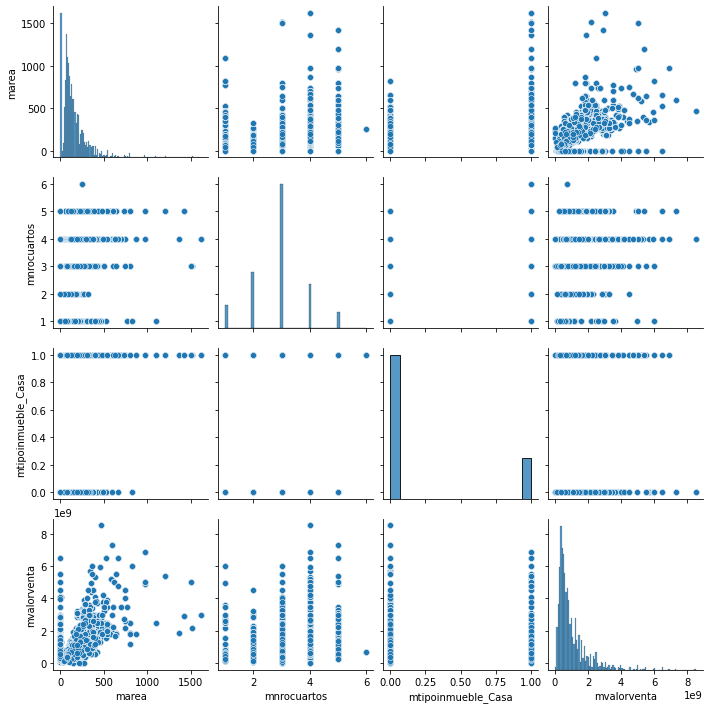

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns

#######################################################
## El ejericicio consiste en proponer algunas variables 
## numéricas y categóricas para mejorar el modelo.
## En seguida selecciónelas y evalúe el modelo
num_columnas = ['marea', 'mnrocuartos']
cat_columnas = ['mtipoinmueble']
#######################################################

X = tabla_con_variables_seleccionadas(num_columnas, cat_columnas)
y = datos_filtro['mvalorventa']

# El gráfico pairs permite revisar los datos seleccionados
sns.pairplot(pd.concat([X, y], axis=1))

Una vez se han seleccionado las variables de entrada $X$ y la salida $y$, debemos evaluar el modelo. Existen distintos métodos estadísticos para hacerlo. 

Uno de los principales objetivos de Machine Learning es generar modelos de pronóstico. Por tal motivo una de las principales tareas es evaluar los modelos generados mediante la partición de los datos en entrenamiento (train) y evaluación (test).

En seguida se utiliza la función `train_test_split` del paquete `sklearn`, la cual permite dividir los datos en un porcentaje dado por el parámetro `train_size`. Aquí se utilizó 80% de los datos para ajustar el modelo (entrenar) y el restante 20% para evaluar (testear).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

Ahora, se realiza el modelo utilizando:
1. Una estandarización de tal manera que la media de cada variable sea 0 y su desviación estándar 1. Esto permite un mejor rendimiento del algoritmo evitando que las variables con mayor escala tengan mayor importancia sobre las demás.
2. Aplicando la clase `SGDRegressor` para ajustar el modelo lineal.

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Se realiza el modelo aplicando estandarización y regresión SGD
modelo_reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01))

# Se ajusta el modelo
modelo_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

Ahora se realiza el pronóstico sobre los datos de evaluación (testeo).

In [ ]:
y_pred = modelo_reg.predict(X_test)

Y finalmente, se evalúa el desempeño del modelo mediante la función `mean_squared_error` de `sklearn`, la cual compara el precio real de la vivienda y su pronóstico.
$$mean\_squared\_error = \sqrt{\frac{1}{n}\sum\left(y_{true} - y_{pred}\right)^2}$$

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, y_pred, squared=False)/1e9
print('El error cuadrático medio es:', round(error,2), 'miles de millones de pesos')

El error cuadrático medio es: 0.71 miles de millones de pesos


Haga doble click en este espacio y llene la tabla con cada modelo intentado junto con su error cuadrático medio:

Modelo                                    | error (miles de millones de pesos) |
----------------------------------------- | ---------------------------------- |
precio ~ marea+mnrocuartos+mtipoinmuelbe  | 0.71                               |
precio ~ ??                               | ??                                 |
precio ~ ??                               | ??                                 |
precio ~ ??                               | ??                                 |
precio ~ ??                               | ??                                 |


## Actividad 2: Pronosticando el tipo de inmueble

Se pretende pronosticar el tipo de inmueble aplicando regresión logística (solo hay dos categorías: apartamento (1) o casa (0)).

![](https://qph.fs.quoracdn.net/main-qimg-e3de09c45ef1d984d0636d7467b06713)

### **Ejercicio 4**:

Ahora, a partir de los demás datos, se construirá un modelo de regresión logística que encuentre el tipo de inmueble: casa o apartamento.

In [ ]:
from sklearn.linear_model import LogisticRegression

#######################################################
## El ejercicio consiste en proponer algunas variables 
## para mejorar el modelo.
## En seguida selecciónelas y evalúe el modelo
num_columnas = ['mvalorventa']
#######################################################
X2 = datos_filtro[num_columnas]
y2 = datos_filtro['mtipoinmueble']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8)

modelo_log = LogisticRegression(solver="lbfgs")
modelo_log.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

En seguida se realiza el pronóstico

In [ ]:
y2_pred = modelo_log.predict(X2_test)
y2_pred

array(['Apartamento', 'Apartamento', 'Apartamento', ..., 'Apartamento',
       'Apartamento', 'Apartamento'], dtype=object)

Al igual que la regresión lineal tiene una métrica para evaluar su desempeño del pronóstico, la regresión logística utiliza métricas de evaluación para la tarea de clasificación. Una de las más utilizadas es la [matriz de confusión](https://en.wikipedia.org/wiki/Confusion_matrix). Es una tabla de contingencia que evalúa la cantidad de Falsos Positivos (FP), Falsos Negativos (FN), Verdaderos Positivos (TP) y Verdaderos Negativos (TN).

La siguiente [función](https://github.com/DTrimarchi10/confusion_matrix) realiza la matriz de confusión y calcula algunas métricas importantes para evaluar el modelo.

In [ ]:
# Esta función es modificada de https://github.com/DTrimarchi10/confusion_matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in long_scalars


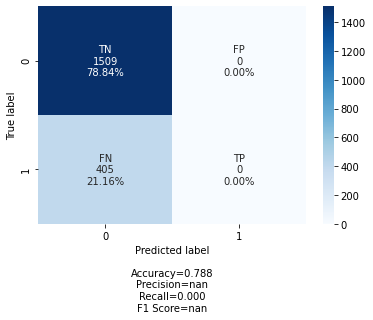

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y2_test, y2_pred)
make_confusion_matrix(cf, group_names=['TN', 'FP', 'FN', 'TP'])

Como puede observar la variable `mvalorventa` no es una buena variable regresora para el tipo de inmueble (casa o apartamento). Se observa en la matriz de confusión que el _Accuracy_ es alrededor de 0.8 pero la cantidad de Falsos Negativos es muy elevada (todo lo pronostica como apartamento). Esto nos deja una gran moraleja un _Accuracy_ alto no implica que el modelo sea bueno para pronóstico. Por tal motivo, el F1-score es una excelente métrica que tiene en cuenta los FP y FN. 
* Si F1-score es 0 el modelo es pésimo.
* Si F1-score es 1 el modelo es excelente.

Además, existen otros métodos de evaluación del desempeño del modelo como la curva ROC que se verán más adelante.

Haga doble click en este espacio y llene la tabla con cada modelo intentado junto con su accuracy:

Modelo                                    | accuracy  | F1 Score  |
----------------------------------------- | --------- | --------- |
logit(P(mtipoinmueble)) ~ mvalorventa     | 0.79      | nan       |
logit(P(mtipoinmueble)) ~ ??              | ??        | ??        |
logit(P(mtipoinmueble)) ~ ??              | ??        | ??        |
logit(P(mtipoinmueble)) ~ ??              | ??        | ??        |
logit(P(mtipoinmueble)) ~ ??              | ??        | ??        |


## Actividad 3: Pronosticando zona
Finalmente se prentende pronosticar la zona usando otras variables regresoras.
![](https://www.acueducto.com.co/arcgis/rest/services/Zonas/MapServer/export?dpi=96&transparent=true&format=png32&layers=show%3A0&bbox=-8274619.938500348%2C490500.75143128633%2C-8218820.907852245%2C546299.7820793898&bboxSR=102100&imageSR=102100&size=730%2C730&f=image)

**Ejercicio 5**: Clasificación de la zona

En este ejercicio, deberá clasificar la zona (`mzona`) a partir de las demás variables generando el mejor modelo de pronóstico, reportando la matriz de confusión y métricas de evaluación de sus resultados.

In [ ]:
###################################
## Inserte su código aquí
###################################

Interprete sus resultados aquí